# Enzyme Kinetics with Inhibitors

In this workbook we will introduce simple *Python* commands for exploring enzyme kinetics with inhibition.

So the famous Michaelis-menten equation is

$$ \nu = V_{max} \frac{[S]}{K_M + [S]} $$

The terms $V_{max}$ and $K_M$ can be affected by the presence of inhibitors. So perhaps we should refer to the values as "observed values"; changed from the true values by inhibitors (or activators).

$$ \nu = V_{max}^{obs} \frac{[S]}{K_M^{obs} + [S]} $$

You will have learned that competitve inhibitors compete for the active site and affect the apparent affinity for the substrate but do not change the chemistry of the enzyme and so do not affect $k_{cat}$. As a result, the value for $V_{max}$ will be unchanged. **In the case of a competitive inhibitor** we observe $V_{max}$ is unchanged and that...

$$K_{M}^{obs} = K_{M}\cdot \left(1+\frac{[I]}{K_i}\right)$$

...where $K_i$ is the dissociation constant for the inhibitor and enzyme and $[I]$ is the concentration of the inhibitor.

In the case of a non-competitve inhibitor we observe $K_M$ is unchanged and that...

$$V_{max}^{obs} = \frac{V_{max}}{1+\frac{[I]}{K_i}}$$


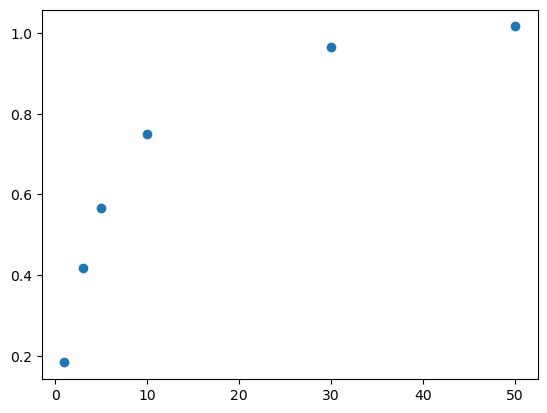

In [1]:
########################
## Problem 7.7
########################


import numpy as np 
from matplotlib import pyplot as plt


#######################
## Facts from problem
#######################

mw_enzyme = 29600 ## g/mole 
g_enzyme = 1E-9   ## g  -  amount of enzyme added to tube
volume = 10       ## mL -  volume of solution
time = 1          ## min. - time period at observation

### Table of concentration of penicillin (substrate) and amount consumed after time period

### Conc (uM), nanomoles
data = [[1,   0.11],
        [3,   0.25],
        [5,   0.34],
        [10,  0.45],
        [30,  0.58],
        [50,  0.61]]

data = np.array(data)   ### Convert list of lists to array.
                        ### NumPy arrays have more math function available

### Collect concetrations and amount reacted data as two separate arrays

conc_penicillin = data[:,0]   ### uM     - all rows, column 0
amount_hydrolyzed = data[:,1] ### nmoles - all rows, column 1

# rate = nanomoles / (mL * 1L/1000mL) / (minutes *  60 seconds/minute)

rate = amount_hydrolyzed / (volume * (1/1000)) / (time * 60/1)  ## nanomoles/L/second

x = conc_penicillin
y = rate

plt.plot(x,y,"o")

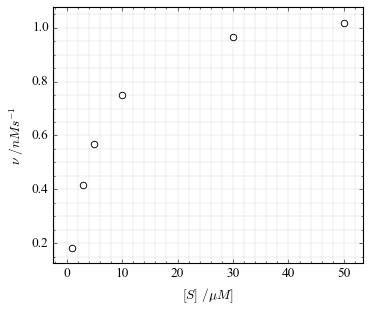

In [5]:
## fancy plot style sheet
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
plt.style.use(github_location_styles + "tufte.mplstyle")        
plt.style.use(github_location_styles + "S2_classic2.mplstyle")        


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)       # add 7% empty space around outside of plot area   

############################
### Set labels and scale 
############################

ax.set(
#    title="pH rate profilr",       
          ylabel=r"$\nu\ /nM s^{-1}$", 
          xlabel=r"$[S]\ /\mu M]$",                
#          xlim=[-1.5,12.5],                  
#          ylim=[-6,-1]
         )

#########################################
### Plot the data                     
#########################################


#plt.vlines([1,3.8,11.5],-6,-1, colors = "lightgray", linewidth = 0.5)

ax.scatter(x,y, s=64, color="white", zorder=2)
ax.scatter(x,y, s=32, color="black", zorder=2)
ax.scatter(x,y, s=16, color="white", alpha = 1.0, zorder=2)

plt.show()